# Predicting The Age of Death - Linear Regression
Dataset : https://www.kaggle.com/kumarajarshi/life-expectancy-who

# Importing Libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Import Dataset

In [2]:
DATASET_URL = 'https://raw.githubusercontent.com/avinash-218/Life-Expectancy-WHO/master/Life_Expectancy_Data.csv'
req = requests.get('https://raw.githubusercontent.com/avinash-218/Life-Expectancy-WHO/master/Life_Expectancy_Data.csv')
url_content = req.content
csv_file = open('Life_Expectancy_Data.csv','wb')
csv_file.write(url_content)
csv_file.close()

In [3]:
dataset = pd.read_csv('Life_Expectancy_Data.csv')
dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Data Cleaning

#### Removing Trailing Spaces in Column Names
Some column names in the dataset contains trailing space. So let's remove the trailing spaces

In [4]:
list(dataset.columns)

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [5]:
def rename_col_names(x):
    out={}
    for i in x:
        out[i] = i.rstrip()
    return out

In [6]:
col_names = list(dataset.columns)
dataset.rename(columns=rename_col_names(col_names), inplace=True)

In [7]:
col_names = list(dataset.columns)
col_names

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 ' BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

Let's Analyse and continue the preprocessing

# Data Analysis

### Numeric Columns

In [8]:
dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


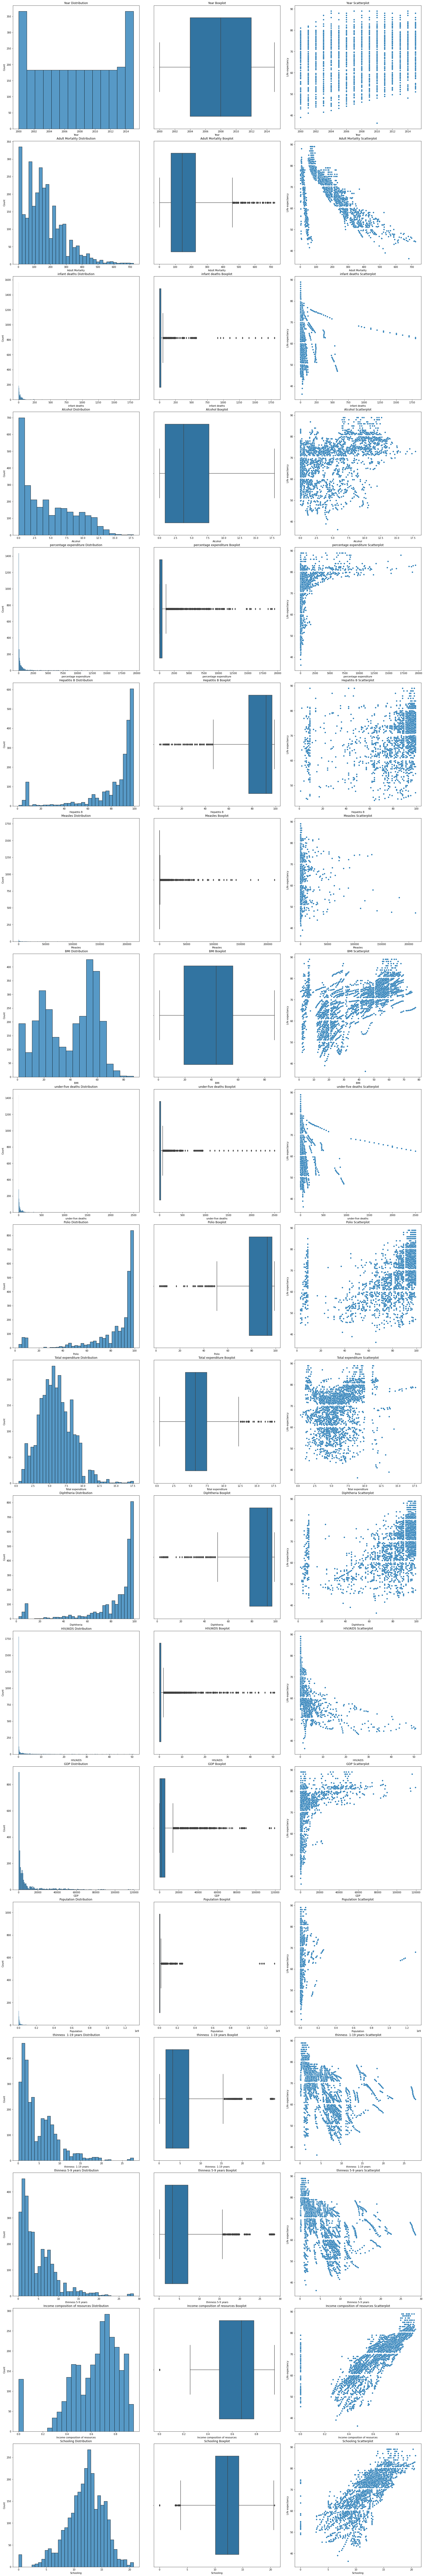

In [9]:
numeric_cols = list(dataset.select_dtypes(include=np.number).columns)
numeric_cols.remove('Life expectancy') #target column
cnt_numeric_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=cnt_numeric_cols, ncols=3, figsize=(25,150))
fig.tight_layout(pad=3)

for i in range(cnt_numeric_cols):
    col = numeric_cols[i]
    axes[i,0].set_title('{} Distribution'.format(col))
    axes[i,0].set_xlabel(col)
    sns.histplot(ax=axes[i,0], x=dataset[col])
      
    axes[i,1].set_title('{} Boxplot'.format(col))
    axes[i,1].set_xlabel(col)
    sns.boxplot(ax=axes[i,1], x=dataset[col])
        
    axes[i,2].set_title('{} Scatterplot'.format(col))
    axes[i,2].set_xlabel(col)
    sns.scatterplot(ax=axes[i,2], data=dataset, x=col, y='Life expectancy')
plt.show()
fig.savefig('Numerical Data Visualisation.jpeg', pil_kwargs={'quality': 95})

<b> Note :</b><br>
Axes, title might not be visible in the saved image if your windows is in dark mode and the image launcher is the default windows program. Try to open with paint if these are not visible.<bt>
Opening in the notebook also helps.

Below Code displays nunique, unique, % of nunique in the column, % of nan for each columns.

In [10]:
print('column \t nunique \t unique \t % of nunique in column \t % of nan')
print('-'*100)
for i in dataset[numeric_cols]:
    print(i,':',dataset[i].nunique(),dataset[i].unique(),dataset[i].nunique()*100/13320,dataset[i].isna().sum()*100/13320,end='\n\n\n')

column 	 nunique 	 unique 	 % of nunique in column 	 % of nan
----------------------------------------------------------------------------------------------------
Year : 16 [2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000] 0.12012012012012012 0.0


Adult Mortality : 425 [263. 271. 268. 272. 275. 279. 281. 287. 295. 291. 293.   3. 316. 321.
  74.   8.  84.  86.  88.  91.   1.   9.  99.  15.  17.  18.  14.  11.
  19. 112. 113. 116. 119. 123. 126. 129. 132. 136. 146. 145. 335. 348.
 355. 358. 361. 365. 369. 371. 375. 381. 382. 386. 388. 391.  44.  48.
  13. 131. 133. 134. 138. 142. 144. 147. 149. 151. 153. 154. 156. 118.
  12. 121. 127. 137. 128. 141.  59.   6.  61.  63.  64.  66.  67.  69.
  71.  73.  75.  78.  65.  68.   7.  77.  76.  81.  85.  92.  96. 125.
 162.  16. 172. 167. 161. 168. 171. 174. 189. 192.  79.  83.  87. 135.
 152. 155. 158. 164. 173.  98. 111. 115. 117. 196. 199.  23. 194. 232.
 222. 226. 224. 243. 252. 247. 253. 262. 254.  89.  95. 1

### Categorical Columns
Lesser categorical valued columns only can be visualized properly.<br>
So visualize only those columns with lesser categories (but let's say threshold 200 here -explained in Note).<br>
<b>Note:</b> This throws error when only one categorical column satisfy with threshold since it will be 1D which contradicts with the below code for 2D.<br>
The plots for the categorical column country is included below because there will be only one categorical column that satisfy lesser nuniques which throws error.

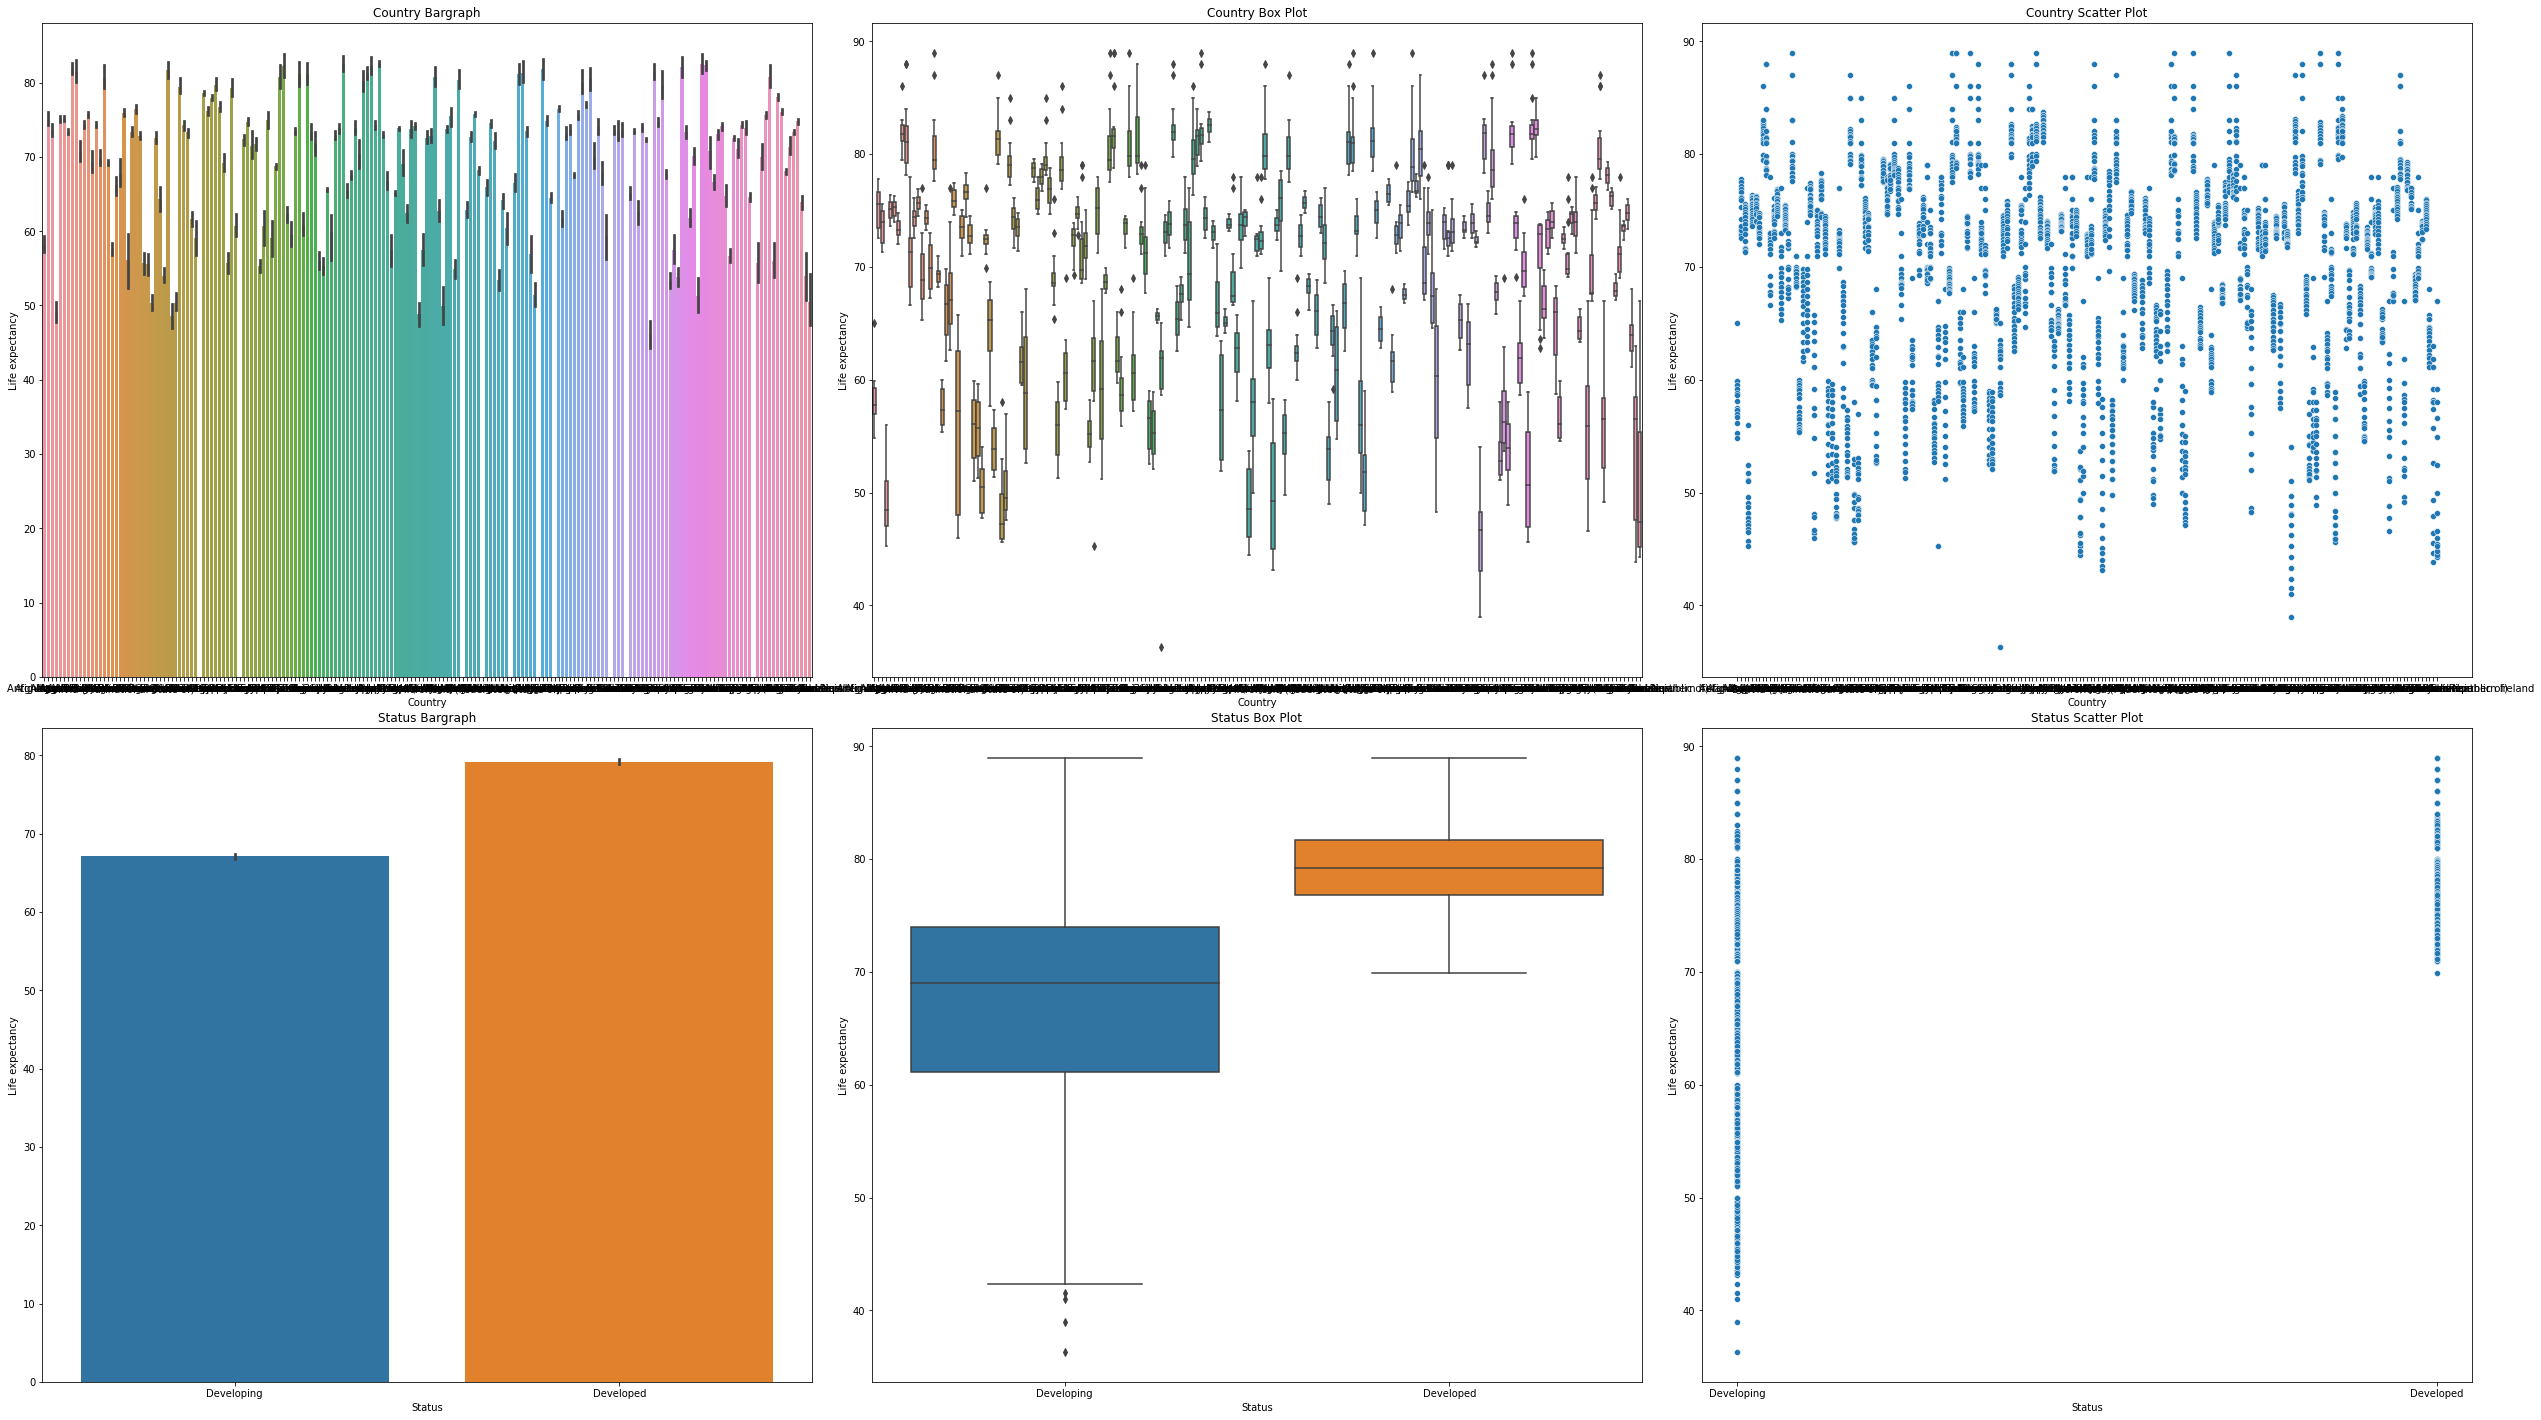

In [11]:
categorical_cols = list(dataset.select_dtypes('object'))
less_category_cols = dataset[categorical_cols].columns[dataset[categorical_cols].nunique() < 200]
cnt_less_category_cols = len(less_category_cols)
fig, axes = plt.subplots(nrows=cnt_less_category_cols, ncols=3, figsize=(35, 20))
fig.tight_layout(pad=3)

for i in range(cnt_less_category_cols):
    col = less_category_cols[i]
      
    axes[i,0].set_title('{} Bargraph'.format(col))
    axes[i,0].set_xlabel(col)
    sns.barplot(ax=axes[i,0], data=dataset, x=col, y='Life expectancy')
    
    axes[i,1].set_title('{} Box Plot'.format(col))
    axes[i,1].set_xlabel(col)
    sns.boxplot(ax=axes[i,1], x=dataset[col], y=dataset['Life expectancy'])
        
    axes[i,2].set_title('{} Scatter Plot'.format(col))
    axes[i,2].set_xlabel(col)
    sns.scatterplot(ax=axes[i,2], data=dataset, x=col, y='Life expectancy')
    
plt.show()
fig.savefig('Categorical Data Visualisation.jpeg', pil_kwargs={'quality': 95})

#### Null Values Tratement

Percentage of null values in each columns

Fill missing values grouped by countries.<br>
Eg: Fill missing values in GDP based on the same country.<br>
Remove the rows in which the target column is NaN

In [12]:
dataset = dataset[dataset['Life expectancy'].notna()].copy()
dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [13]:
dataset.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [14]:
dataset.isna().sum() / dataset.shape[0] * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             6.591530
percentage expenditure              0.000000
Hepatitis B                        18.886612
Measles                             0.000000
 BMI                                1.092896
under-five deaths                   0.000000
Polio                               0.648907
Total expenditure                   7.718579
Diphtheria                          0.648907
 HIV/AIDS                           0.000000
GDP                                15.129781
Population                         21.994536
 thinness  1-19 years               1.092896
 thinness 5-9 years                 1.092896
Income composition of resources     5.464481
Schooling                           5.464481
dtype: flo

In [15]:
columns_with_null = list(dataset.columns[dataset.isna().any()])
dataset[columns_with_null] = dataset.groupby('Country')[columns_with_null].transform(lambda x:x.fillna(x.mean()))
dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [16]:
dataset.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                             16
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                400
Population                         640
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [17]:
dataset.isna().sum() / dataset.shape[0] * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             0.546448
percentage expenditure              0.000000
Hepatitis B                         4.918033
Measles                             0.000000
 BMI                                1.092896
under-five deaths                   0.000000
Polio                               0.000000
Total expenditure                   1.092896
Diphtheria                          0.000000
 HIV/AIDS                           0.000000
GDP                                13.661202
Population                         21.857923
 thinness  1-19 years               1.092896
 thinness 5-9 years                 1.092896
Income composition of resources     5.464481
Schooling                           5.464481
dtype: flo

Even now some data are NaN. This is because for some countries these columns were not measured. So just drop them

In [18]:
dataset.dropna(inplace=True)

In [19]:
dataset.isna().sum() / dataset.shape[0] * 100

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

In [20]:
dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


#### Encoding Status Column

In [21]:
def status_encode(x):
    if(x=='Developed'):
        return 1
    else:
        return 0

In [22]:
dataset['Status'] = dataset['Status'].apply(status_encode)
dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [23]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(dataset[['Country']])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [24]:
encoded_cols = list(encoder.get_feature_names())
encoded_cols

['x0_Afghanistan',
 'x0_Albania',
 'x0_Algeria',
 'x0_Angola',
 'x0_Argentina',
 'x0_Armenia',
 'x0_Australia',
 'x0_Austria',
 'x0_Azerbaijan',
 'x0_Bangladesh',
 'x0_Belarus',
 'x0_Belgium',
 'x0_Belize',
 'x0_Benin',
 'x0_Bhutan',
 'x0_Bosnia and Herzegovina',
 'x0_Botswana',
 'x0_Brazil',
 'x0_Bulgaria',
 'x0_Burkina Faso',
 'x0_Burundi',
 'x0_Cabo Verde',
 'x0_Cambodia',
 'x0_Cameroon',
 'x0_Canada',
 'x0_Central African Republic',
 'x0_Chad',
 'x0_Chile',
 'x0_China',
 'x0_Colombia',
 'x0_Comoros',
 'x0_Costa Rica',
 'x0_Croatia',
 'x0_Cyprus',
 'x0_Djibouti',
 'x0_Dominican Republic',
 'x0_Ecuador',
 'x0_El Salvador',
 'x0_Equatorial Guinea',
 'x0_Eritrea',
 'x0_Estonia',
 'x0_Ethiopia',
 'x0_Fiji',
 'x0_France',
 'x0_Gabon',
 'x0_Georgia',
 'x0_Germany',
 'x0_Ghana',
 'x0_Greece',
 'x0_Guatemala',
 'x0_Guinea',
 'x0_Guinea-Bissau',
 'x0_Guyana',
 'x0_Haiti',
 'x0_Honduras',
 'x0_India',
 'x0_Indonesia',
 'x0_Iraq',
 'x0_Ireland',
 'x0_Israel',
 'x0_Italy',
 'x0_Jamaica',
 'x0_J

In [25]:
dataset[encoded_cols] = encoder.transform(dataset[['Country']])
dataset = dataset.drop('Country',axis=1)
dataset

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,x0_Tunisia,x0_Turkey,x0_Turkmenistan,x0_Uganda,x0_Ukraine,x0_Uruguay,x0_Uzbekistan,x0_Vanuatu,x0_Zambia,x0_Zimbabwe
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2934,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Identifying Input & Target Column(s)

In [26]:
def identify_cols(dataset):
    col_names = list(dataset.columns)
    input_cols = col_names.copy()
    input_cols.remove('Life expectancy')
    target_col = 'Life expectancy'
    #encoded_cols
    X = dataset[input_cols]
    Y = dataset[target_col]
    return  X, Y

In [27]:
X, Y = identify_cols(dataset)

# Feature Engineering
scikit-learn's mutual_info_regression and mutual_info_classif treat discrete and continuous values differently. So it is required to inform which are discrete columns.

##### Base Model

In [28]:
model_df=pd.DataFrame()
def train_validate(X, Y,stri):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
    #X_train.shape, Y_train.shape, X_test.shape, Y_test.shape
    model = LinearRegression()
    model.fit(X_train, Y_train)
    df = pd.DataFrame({'Train Accuracy':[model.score(X_train, Y_train)*100],'Test Accuracy':[model.score(X_test, Y_test)*100]},index=[stri])
    return df

In [29]:
model_df = pd.concat([model_df, train_validate(X,Y,'Base Model')])
model_df

,Train Accuracy,Test Accuracy
Base Model,96.172461,96.854796


In [30]:
base_acc = abs(model_df['Train Accuracy'][0]-model_df['Test Accuracy'][0])
base_acc

0.68233503812138

## MI Scores

In [31]:
discrete_features = (X.dtypes == 'int64') #finding the discrete columns
def find_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_regression(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [32]:
mi_scores = find_mi_scores(X, Y, discrete_features)
mi_scores

Adult Mortality                    1.309527
Income composition of resources    0.986112
 thinness  1-19 years              0.855579
 thinness 5-9 years                0.807710
Schooling                          0.734944
                                     ...   
x0_Uganda                          0.000000
x0_Guatemala                       0.000000
x0_Iraq                            0.000000
x0_Latvia                          0.000000
x0_Turkey                          0.000000
Name: MI Scores, Length: 153, dtype: float64

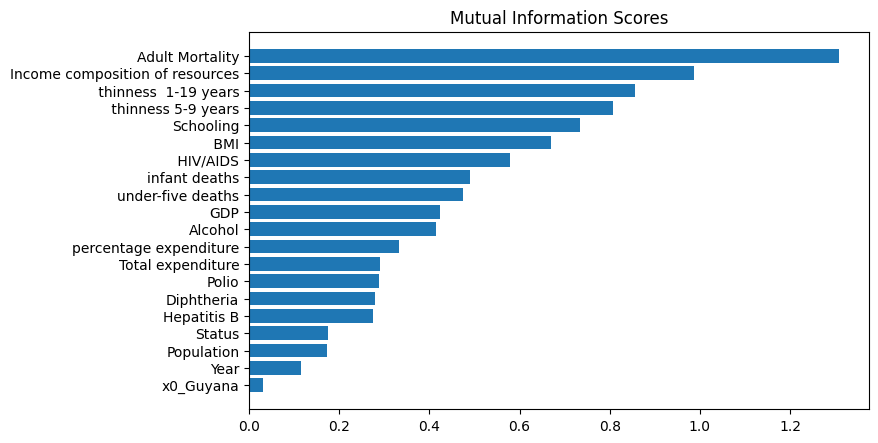

In [33]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks=list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')
plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores[:20])

The bar graph is plotted in descending order.<br>
So, the rest of the encoded Country Columns are still lesser.<br>
So it is not necessary to visualize the MI Score of them too.

### Model without Categorical Columns (manual)

##### Model without Country Column(original + encoded)

In [34]:
X, Y = identify_cols(dataset.drop(encoded_cols, axis=1))
train_validate(X, Y, 'Without Country')

,Train Accuracy,Test Accuracy
Without Country,83.35457,84.736791


Accuray decreases so this column should be considered

### Model without Numerical Columns (Auto)

```
col_names = list(mi_scores.index)
for i in range(len(col_names)-1,-1,-1):
    col = col_names[i]
    if(col not in encoded_cols):
        X, Y = identify_cols(dataset.drop(col, axis=1))
        model_df = pd.concat([model_df, train_validate(X,Y,'Without ' + col + ' :')])
```

In [35]:
model_df.sort_values(by=['Train Accuracy','Test Accuracy'], ascending=False)

,Train Accuracy,Test Accuracy
Base Model,96.172461,96.854796


### Feature Selection
Discard the features which are causing irrelevant contribution to the dataset.<br>
(Negative Impact or no Impact)

In [36]:
col_names = list(mi_scores.index)
for i in range(len(col_names)-1,-1,-1):
    col = col_names[i]
    if(col not in encoded_cols):
        val_col = dataset[col].copy()
        dataset = dataset.drop(col, axis=1)
        X, Y = identify_cols(dataset)
        tr,te = train_validate(X,Y,'Without ' + col + ' :')['Train Accuracy'],train_validate(X,Y,'Without ' + col + ' :')['Test Accuracy']
        err = abs(tr[0]-te[0])
        if(base_acc <= err):
            base_acc = err
        else:
            dataset[col] = val_col

In [37]:
col_to_consider =[i for i in dataset.columns.to_list() if i not in encoded_cols]
print('Columns Which are to be considered (after Feature Engineering)\n',col_to_consider)

Columns Which are to be considered (after Feature Engineering)
 ['Life expectancy', 'Year', 'Polio', 'Alcohol', 'under-five deaths', 'infant deaths', ' HIV/AIDS', ' BMI', 'Schooling', ' thinness 5-9 years']


In [38]:
len(col_to_consider)

10

# Train Test Split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1702, 142), (1702,), (426, 142), (426,))

In [40]:
model = LinearRegression()
model.fit(X_train, Y_train)
print('Training Accuracy :',model.score(X_train, Y_train)*100)
print('Test Accuracy :',model.score(X_test, Y_test)*100)

Training Accuracy : 96.06651781798038
Test Accuracy : 96.90104889180705


# K-Fold Cross Validation

In [41]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_sc = cross_val_score(LinearRegression(), X, Y, cv=kf)
print('Accuracy :',kf_sc.mean()*100)

Accuracy : 95.5461081999635


# Cross Validation

In [42]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cv_sc = cross_val_score(LinearRegression(), X, Y, cv=cv)
print('Accuracy :',cv_sc.mean()*100)

Accuracy : 96.14332128969298


# Grid Search CV

In [43]:
def find_best_model(X, Y):
    algos={
        'linear_reg':{'model':LinearRegression(), 'params':{'normalize':[True, False]}},
        'lasso':{'model':Lasso(), 'params':{'alpha':[1,2], 'selection':['random', 'cyclic']}},
        'decision_tree':{'model':DecisionTreeRegressor(), 'params':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}},
        'random_forest':{'model':RandomForestRegressor(), 'params':{'n_jobs':[-1], 'n_estimators':[10, 50, 100],'max_depth':[5,10,20], 'max_leaf_nodes':[50, 100]}},
        'xgb':{'model':XGBRegressor(), 'params':{'n_jobs':[-1], 'n_estimators':[10,50,100],'max_depth':[5,10,20],'max_leaf_nodes':[50,100],'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.55],'booster':['gblinear']}}
            }
    scores = []
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.2)
    for algo, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model':algo,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score', 'best_params'])
models_summary = find_best_model(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2276.416577698681, tolerance: 15.431794360164513
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2912.5631571378544, tolerance: 15.847705763219743
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3514.319873400709, tolerance: 16.11846145475911
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

[15:14:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:14:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be 

[15:15:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [44]:
models_summary

,model,best_score,best_params
0,linear_reg,0.961436,{'normalize': True}
1,lasso,0.781441,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.938146,"{'criterion': 'mse', 'splitter': 'random'}"
3,random_forest,0.955257,"{'max_depth': 20, 'max_leaf_nodes': 100, 'n_es..."
4,xgb,0.949871,"{'booster': 'gblinear', 'learning_rate': 0.55,..."


From the summary above,<br>
<b>Linear Regression</b> with parameter(s) : normalize:'False' gives the best result

# Final Best Model

In [46]:
model = LinearRegression(normalize=True)
model.fit(X_train, Y_train)
print('Training Accuracy :',model.score(X_train, Y_train)*100)
print('Test Accuracy :',model.score(X_test, Y_test)*100)

Training Accuracy : 96.06375334592144
Test Accuracy : 96.89331257361829


In [47]:
Y_train.values,model.predict(X_train)

(array([81.4, 63.5, 58.6, ..., 78. , 75. , 59.7]),
 array([82.140625  , 63.56640625, 57.86328125, ..., 72.55078125,
        74.04882812, 57.73828125]))

In [48]:
Y_test.values,model.predict(X_test)

(array([72.7, 66.3, 73. , 73.1, 60. , 72.2, 43.3, 72.3, 75.6, 74.1, 63.4,
        74.4, 77.7, 65.8, 69.5, 75.6, 75. , 81.6, 69.4, 79.9, 64. , 44. ,
        72.1, 54.3, 74.7, 72.4, 72.4, 52.7, 79.5, 68. , 68.4, 66.1, 68.9,
        65.5, 75.6, 75.5, 73. , 66.9, 59. , 57.7, 83. , 59.1, 46. , 75. ,
        46.2, 54.9, 74.8, 73.5, 74. , 65. , 76.5, 75.7, 52.1, 58.6, 51.6,
        75.1, 78.1, 71. , 54. , 77.3, 73. , 73.6, 54.4, 48.5, 63.7, 72.5,
        72.7, 75.9, 56.1, 79.5, 72.1, 73.6, 74.7, 73.3, 66.9, 57. , 63.4,
        75.1, 62.8, 54.9, 55. , 67. , 76.2, 63. , 74.5, 72.8, 72. , 56. ,
        58.7, 48.6, 75.5, 83. , 73. , 62.9, 74.2, 66.6, 75.4, 57.4, 85. ,
        64.3, 46.3, 68.1, 64.8, 62.4, 78.2, 61.8, 74.9, 81. , 72.8, 73.6,
        57.9, 75.5, 72.7, 46.8, 59.3, 77.4, 82. , 73. , 79. , 73. , 64.8,
        45.9, 67.2, 78.7, 58.9, 54. , 53.8, 78.8, 66.1, 73.6, 71. , 79.6,
        74.5, 63.3, 52.5, 66.7, 81. , 73.2, 58.1, 78.7, 48.2, 76. , 69.4,
        73.5, 58. , 58. , 73.1, 61.7, 